In [40]:
from sklearn.externals import joblib
import matplotlib.pyplot as plt

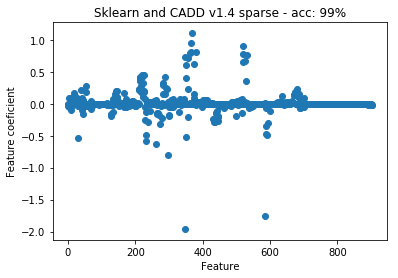

In [26]:
# Load model
model_file = "/tmp/gin-train/bcf1796306f64f8992274585932cf870/model.h5"
clf = joblib.load(model_file)
plt.scatter(range(clf.coef_.shape[1]), clf.coef_.ravel());
plt.xlabel("Feature")
plt.ylabel("Feature coeficient")
plt.title("Sklearn and CADD v1.4 sparse - acc: 99%")
plt.show()

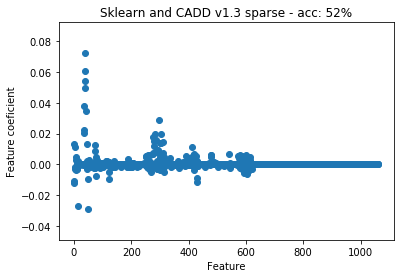

In [24]:
# Load model
model_file = "/tmp/gin-train/6d1e6049c11b48b7b02a1856d421cbab/model.h5"
clf = joblib.load(model_file)
plt.scatter(range(clf.coef_.shape[1]), clf.coef_.ravel());
plt.xlabel("Feature")
plt.ylabel("Feature coeficient")
plt.title("Sklearn and CADD v1.3 sparse - acc: 52%")
plt.show()

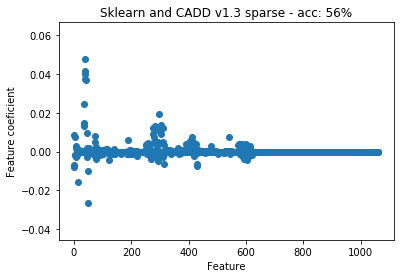

In [25]:
# Load model
model_file = "/tmp/gin-train/62cdc2663f484ba9a9614dcd8283aad9/model.h5"
clf = joblib.load(model_file)
plt.scatter(range(clf.coef_.shape[1]), clf.coef_.ravel());
plt.xlabel("Feature")
plt.ylabel("Feature coeficient")
plt.title("Sklearn and CADD v1.3 sparse - acc: 56%")
plt.show()

## Verify DataSets

In [52]:
from kipoi_cadd.data import CaddSparseDataset, cadd_sparse_train_valid_data_one, sparse_cadd_dataset
from kipoi_cadd.models import logistic_regression_keras

sparse_matrix = "/s/project/kipoi-cadd/data/raw/v1.4/training_data/GRCh37/sparse_matrices/sample_10k.npz"
variant_ids_file = "/s/project/kipoi-cadd/data/raw/v1.4/training_data/GRCh37/variant_ids/sample_10k.pkl"

In [53]:
training_ds, validation_ds = cadd_sparse_train_valid_data_one(sparse_cadd_dataset(sparse_matrix, variant_ids_file))
model = logistic_regression_keras(904)
model_cadd_dir = "/s/project/kipoi-cadd/data/models/CADD1.4-GRCh37.mod"
model_cadd, scaler = joblib.load(model_cadd_dir)

In [54]:
# Train
batch_size = 16

"""
train_it = training_ds.batch_train_iter(batch_size=batch_size,shuffle=True,num_workers=1)
next(train_it)
valid_it = validation_ds.batch_train_iter(batch_size=batch_size,shuffle=True,num_workers=1)
next(valid_it)
model.fit_generator(train_it,epochs=1,
                     steps_per_epoch=max(int(len(training_ds) / batch_size), 1),
                     validation_data=valid_it,
                     validation_steps=max(int(len(validation_ds) / batch_size), 1)
                     )
"""
(x_train, y_train), (x_valid, y_valid) = training_ds.load_all(), validation_ds.load_all()
x_train = x_train.toarray()
scaler.transform(x_train)
model.fit(x_train, y_train, validation_data=(x_valid, y_valid))


Train on 7000 samples, validate on 3000 samples
Epoch 1/1
7000/7000 [==============================] - 1s 142us/step - loss: 0.5976 - mean_absolute_error: 0.0994 - binary_accuracy: 0.9483 - val_loss: 2.2109 - val_mean_absolute_error: 0.1543 - val_binary_accuracy: 0.8503


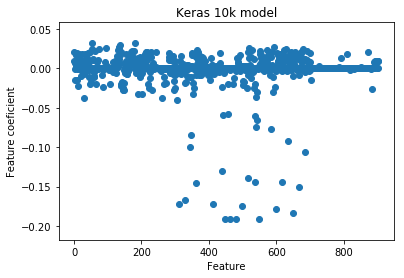

In [55]:
# Load model
plt.scatter(range(model.get_weights()[0].shape[0]), model.get_weights()[0]);
plt.xlabel("Feature")
plt.ylabel("Feature coeficient")
plt.title("Keras 10k model")
plt.show()

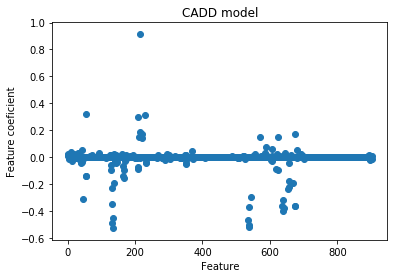

In [50]:
# Load model
from keras.models import load_model
model_file = "/tmp/gin-train/cd20a39802ab46aa949a1b6beb572051/model.h5"
clf = load_model(model_file)
plt.scatter(range(clf.get_weights()[0].shape[0]), clf.get_weights()[0]);
plt.xlabel("Feature")
plt.ylabel("Feature coeficient")
plt.title("Keras 10k model")
plt.show()

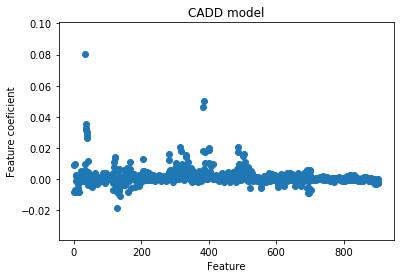

In [25]:
# Load model
plt.scatter(range(model_cadd.coef_.shape[1]), model_cadd.coef_.ravel());
plt.xlabel("Feature")
plt.ylabel("Feature coeficient")
plt.title("CADD model")
plt.show()

In [37]:
from kipoi.data_utils import numpy_collate_concat
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

# Evaluate
lpreds = []
llabels = []
for inputs, targets in tqdm(validation_ds.batch_train_iter(cycle=False,
                                                           num_workers=1,
                                                           batch_size=batch_size),
                            total=len(validation_ds) // batch_size
                            ):
    pre = model.predict_on_batch(inputs).ravel()
    lpreds.append(pre)
    llabels.append(targets)
print("Finished getting validation predictions.")
preds = numpy_collate_concat(lpreds)
labels = numpy_collate_concat(llabels)
del lpreds
del llabels

# print("labels", labels[:10])
# print("preds", preds[:10], preds[:10].ravel())

print("Confusion matrix:\n", confusion_matrix(labels, preds.round()))

188it [00:01, 165.03it/s]                        

Finished getting validation predictions.
Confusion matrix:
 [[1566   14]
 [  24 1396]]
